## Preliminaries

Import necessary libraries

In [1]:
import json
import pandas as pd
import numpy as np
import os
import collections
import unicodedata
import matplotlib.pyplot as plt

import tomotopy as tp
import spacy 
nlp = spacy.load("en_core_web_sm")

## Data Collection

Load the data.  
Data source: https://www.kaggle.com/Cornell-University/arxiv (as of 23 March 2022)  
Reference: https://github.com/mattbierbaum/arxiv-public-datasets

In [126]:
data_file = '/data/arxiv-metadata-oai-snapshot.json'

Set category schema according to https://arxiv.org/category_taxonomy (as of 23 March 2022).  
Rename cond-mat subfields to 'Condensed Matter Physics' to extract all condensed matter physics papers.

In [127]:
category_schema = {'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Astrophysics',
'astro-ph.EP': 'Astrophysics',
'astro-ph.GA': 'Astrophysics',
'astro-ph.HE': 'Astrophysics',
'astro-ph.IM': 'Astrophysics',
'astro-ph.SR': 'Astrophysics',
'cond-mat.dis-nn': 'Condensed Matter Physics',
'cond-mat.mes-hall': 'Condensed Matter Physics',
'cond-mat.mtrl-sci': 'Condensed Matter Physics',
'cond-mat.other': 'Condensed Matter Physics',
'cond-mat.quant-gas': 'Condensed Matter Physics',
'cond-mat.soft': 'Condensed Matter Physics',
'cond-mat.stat-mech': 'Condensed Matter Physics',
'cond-mat.str-el': 'Condensed Matter Physics',
'cond-mat.supr-con': 'Condensed Matter Physics',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CG': 'Computational Geometry',
'cs.CL': 'Computation and Language',
'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.DM': 'Discrete Mathematics',
'cs.DS': 'Data Structures and Algorithms',
'cs.ET': 'Emerging Technologies',
'cs.FL': 'Formal Languages and Automata Theory',
'cs.GL': 'General Literature',
'cs.GR': 'Graphics',
'cs.GT': 'Computer Science and Game Theory',
'cs.HC': 'Human-Computer Interaction',
'cs.IR': 'Information Retrieval',
'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
'cs.LO': 'Logic in Computer Science',
'cs.MA': 'Multiagent Systems',
'cs.MM': 'Multimedia',
'cs.MS': 'Mathematical Software',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
'cs.PF': 'Performance',
'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
'cs.SC': 'Symbolic Computation',
'cs.SD': 'Sound',
'cs.SE': 'Software Engineering',
'cs.SI': 'Social and Information Networks',
'cs.SY': 'Systems and Control',
'econ.EM': 'Econometrics',
'eess.AS': 'Audio and Speech Processing',
'eess.IV': 'Image and Video Processing',
'eess.SP': 'Signal Processing',
'gr-qc': 'General Relativity and Quantum Cosmology',
'hep-ex': 'High Energy Physics - Experiment',
'hep-lat': 'High Energy Physics - Lattice',
'hep-ph': 'High Energy Physics - Phenomenology',
'hep-th': 'High Energy Physics - Theory',
'math.AC': 'Commutative Algebra',
'math.AG': 'Algebraic Geometry',
'math.AP': 'Analysis of PDEs',
'math.AT': 'Algebraic Topology',
'math.CA': 'Classical Analysis and ODEs',
'math.CO': 'Combinatorics',
'math.CT': 'Category Theory',
'math.CV': 'Complex Variables',
'math.DG': 'Differential Geometry',
'math.DS': 'Dynamical Systems',
'math.FA': 'Functional Analysis',
'math.GM': 'General Mathematics',
'math.GN': 'General Topology',
'math.GR': 'Group Theory',
'math.GT': 'Geometric Topology',
'math.HO': 'History and Overview',
'math.IT': 'Information Theory',
'math.KT': 'K-Theory and Homology',
'math.LO': 'Logic',
'math.MG': 'Metric Geometry',
'math.MP': 'Mathematical Physics',
'math.NA': 'Numerical Analysis',
'math.NT': 'Number Theory',
'math.OA': 'Operator Algebras',
'math.OC': 'Optimization and Control',
'math.PR': 'Probability',
'math.QA': 'Quantum Algebra',
'math.RA': 'Rings and Algebras',
'math.RT': 'Representation Theory',
'math.SG': 'Symplectic Geometry',
'math.SP': 'Spectral Theory',
'math.ST': 'Statistics Theory',
'math-ph': 'Mathematical Physics',
'nlin.AO': 'Adaptation and Self-Organizing Systems',
'nlin.CD': 'Chaotic Dynamics',
'nlin.CG': 'Cellular Automata and Lattice Gases',
'nlin.PS': 'Pattern Formation and Solitons',
'nlin.SI': 'Exactly Solvable and Integrable Systems',
'nucl-ex': 'Nuclear Experiment',
'nucl-th': 'Nuclear Theory',
'physics.acc-ph': 'Accelerator Physics',
'physics.ao-ph': 'Atmospheric and Oceanic Physics',
'physics.app-ph': 'Applied Physics',
'physics.atm-clus': 'Atomic and Molecular Clusters',
'physics.atom-ph': 'Atomic Physics',
'physics.bio-ph': 'Biological Physics',
'physics.chem-ph': 'Chemical Physics',
'physics.class-ph': 'Classical Physics',
'physics.comp-ph': 'Computational Physics',
'physics.data-an': 'Data Analysis, Statistics and Probability',
'physics.ed-ph': 'Physics Education',
'physics.flu-dyn': 'Fluid Dynamics',
'physics.gen-ph': 'General Physics',
'physics.geo-ph': 'Geophysics',
'physics.hist-ph': 'History and Philosophy of Physics',
'physics.ins-det': 'Instrumentation and Detectors',
'physics.med-ph': 'Medical Physics',
'physics.optics': 'Optics',
'physics.plasm-ph': 'Plasma Physics',
'physics.pop-ph': 'Popular Physics',
'physics.soc-ph': 'Physics and Society',
'physics.space-ph': 'Space Physics',
'q-bio.BM': 'Biomolecules',
'q-bio.CB': 'Cell Behavior',
'q-bio.GN': 'Genomics',
'q-bio.MN': 'Molecular Networks',
'q-bio.NC': 'Neurons and Cognition',
'q-bio.OT': 'Other Quantitative Biology',
'q-bio.PE': 'Populations and Evolution',
'q-bio.QM': 'Quantitative Methods',
'q-bio.SC': 'Subcellular Processes',
'q-bio.TO': 'Tissues and Organs',
'q-fin.CP': 'Computational Finance',
'q-fin.EC': 'Economics',
'q-fin.GN': 'General Finance',
'q-fin.MF': 'Mathematical Finance',
'q-fin.PM': 'Portfolio Management',
'q-fin.PR': 'Pricing of Securities',
'q-fin.RM': 'Risk Management',
'q-fin.ST': 'Statistical Finance',
'q-fin.TR': 'Trading and Market Microstructure',
'quant-ph': 'Quantum Physics',
'stat.AP': 'Applications',
'stat.CO': 'Computation',
'stat.ME': 'Methodology',
'stat.ML': 'Machine Learning',
'stat.OT': 'Other Statistics',
'stat.TH': 'Statistics Theory'}

Read the json file to get the data.  
Code ref: https://www.kaggle.com/code/maartengr/topic-modeling-arxiv-abstract-with-bertopic (23 March)

In [128]:
# read metadata
def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line # yield prevents memory issues
            
# check contents/structure of json file
metadata = get_metadata()
for paper in metadata:
    for k, v in json.loads(paper).items():
        print(f'{k}: {v}')
    break

id: 0704.0001
submitter: Pavel Nadolsky
authors: C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan
title: Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies
comments: 37 pages, 15 figures; published version
journal-ref: Phys.Rev.D76:013009,2007
doi: 10.1103/PhysRevD.76.013009
report-no: ANL-HEP-PR-07-12
categories: hep-ph
license: None
abstract:   A fully differential calculation in perturbative quantum chromodynamics is
presented for the production of massive photon pairs at hadron colliders. All
next-to-leading order perturbative contributions from quark-antiquark,
gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as
all-orders resummation of initial-state gluon radiation valid at
next-to-next-to-leading logarithmic accuracy. The region of phase space is
specified in which the calculation is most reliable. Good agreement is
demonstrated with data from the Fermilab Tevatron, and predictions are made for
more detailed tests w

Get data from the metadata file.

In [ ]:
# helper method to get year from versions field
def get_year(ref):
    year = []
    for data in ref:
        year = data['created'][-17:-13]
        break
    return year

In [7]:
# get 2017 to 2021 condensed matter physics titles and abstracts
cm_titles = []
cm_abstracts = []
cm_years = []
cm_docs = []
metadata = get_metadata()
for paper in metadata:
    paper_dict = json.loads(paper)
    ref = paper_dict.get('versions') # year is based on the first version uploaded to arXiv
    try:
        year = int(get_year(ref))
        if 2016 < year <= 2021:
            cat = category_schema[paper_dict.get('categories').split(" ")[0]]
            if cat == 'Condensed Matter Physics':
                cm_years.append(year)
                cm_titles.append(paper_dict.get('title'))
                cm_abstracts.append(paper_dict.get('abstract'))
                cm_docs.append(paper_dict.get('title') + paper_dict.get('abstract'))
    except:
        pass 

# check if correctly parsed: values should be the same
len(cm_titles), len(cm_abstracts), len(cm_years), len(cm_docs) 

(76674, 76674, 76674, 76674)

Build dataframe from the lists for further preprocessing.


In [8]:
condmat_df = pd.DataFrame({'title': cm_titles,
                           'year': cm_years,
                           'abstract': cm_abstracts,
                           'doc': cm_docs})

In [9]:
condmat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76674 entries, 0 to 76673
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     76674 non-null  object
 1   year      76674 non-null  int64 
 2   abstract  76674 non-null  object
 3   doc       76674 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
condmat_df.head()

,title,year,abstract,doc
0,Transport through a Majorana island: strong tu...,2017,In the presence of Rashba spin-orbit couplin...,Transport through a Majorana island: strong tu...
1,Electrical Transport of perpendicularly magnet...,2017,Ferromagnetic films of L10-ordered MnGa and ...,Electrical Transport of perpendicularly magnet...
2,Electrostatic Correlations and the Polyelectro...,2017,We address the effects of chain connectivity...,Electrostatic Correlations and the Polyelectro...
3,Full replica symmetry breaking in p-spin-glass...,2017,It is shown that continuously changing the e...,Full replica symmetry breaking in p-spin-glass...
4,Comprehensive study on band-gap variations in ...,2017,We have performed electronic structure calcu...,Comprehensive study on band-gap variations in ...


## Data Preprocessing

Define functions.

In [133]:
# helper function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

In [ ]:
# function clean 'doc'
def clean_text(text):
    lower = text.lower()
    accents_removed = remove_accented_chars(lower)
    doc = nlp(accents_removed)
    words = [token.lemma_ for token in doc if token.is_stop == False and 
         token.is_alpha == True and token.is_punct == False and token.is_space == False and 
         len(token) > 2]
    joined_words = ' '.join(words)
    return joined_words

Clean the text in condmat_df['doc'] then save results to new column 'cleaned'.

In [15]:
condmat_df['cleaned'] = condmat_df['doc'].map(clean_text)

In [17]:
condmat_df.head(10)

,title,year,abstract,doc,cleaned
0,Transport through a Majorana island: strong tu...,2017,In the presence of Rashba spin-orbit couplin...,Transport through a Majorana island: strong tu...,transport majorana island strong tunneling reg...
1,Electrical Transport of perpendicularly magnet...,2017,Ferromagnetic films of L10-ordered MnGa and ...,Electrical Transport of perpendicularly magnet...,electrical transport perpendicularly magnetize...
2,Electrostatic Correlations and the Polyelectro...,2017,We address the effects of chain connectivity...,Electrostatic Correlations and the Polyelectro...,electrostatic correlation polyelectrolyte self...
3,Full replica symmetry breaking in p-spin-glass...,2017,It is shown that continuously changing the e...,Full replica symmetry breaking in p-spin-glass...,replica symmetry break spin glass like system ...
4,Comprehensive study on band-gap variations in ...,2017,We have performed electronic structure calcu...,Comprehensive study on band-gap variations in ...,comprehensive study band gap variation semicon...
5,Many-body mobility edges in a one-dimensional ...,2017,We analyze many body localization (MBL) in a...,Many-body mobility edges in a one-dimensional ...,body mobility edge dimensional model interact ...
6,Restricted Boltzmann Machines for the Long Ran...,2017,We set up Restricted Boltzmann Machines (RBM...,Restricted Boltzmann Machines for the Long Ran...,restrict boltzmann machine long range ising mo...
7,Population Annealing Simulations of a Binary H...,2017,Population annealing is a sequential Monte C...,Population Annealing Simulations of a Binary H...,population anneal simulation binary hard spher...
8,A portable magnetic field of > 3 T generated b...,2017,A trapped magnetic field of greater than 3 T...,A portable magnetic field of > 3 T generated b...,portable magnetic field generate flux jump ass...
9,In-Plane Anisotropies of Polarized Raman Respo...,2017,"The group IV-VI compound SnSe, with an ortho...",In-Plane Anisotropies of Polarized Raman Respo...,plane anisotropy polarize raman response elect...


In [18]:
# check breakdown of docs per year
condmat_df.groupby('year').count()

,title,abstract,doc,cleaned
year,,,,
2017,14418,14418,14418,14418
2018,14710,14710,14710,14710
2019,15213,15213,15213,15213
2020,16183,16183,16183,16183
2021,16150,16150,16150,16150


## Topic Modeling

##### Find parameter ***k*** that gives the best coherence score

In [84]:
# define function to compute different coherence values (Cv) for a range of # of topics
def get_coherence_values(training_data, start, stop, step):
    
    results = {'num_topics': [], 
               'coherence_values': []}
    
    for num_topics in range(start, stop, step):
        
        model = tp.LDAModel(k=num_topics, min_df=1, seed=123)
        
        for text in training_data:
            model.add_doc(text.strip().split())
        
        iterations = 10
        for i in range(0,100,iterations):
            model.train(iterations)
        
        # get average coherence score for each k
        coh = tp.coherence.Coherence(model, coherence='c_v', top_n=10)
        average_coherence = coh.get_score()
        
        results['num_topics'].append(num_topics)
        results['coherence_values'].append(average_coherence)
        
    return results

In [86]:
# check 1-50
training_data = [line for line in condmat_df['cleaned']]
start = 1
stop = 51
step = 4

cv_50 = pd.DataFrame(get_coherence_values(training_data, start, stop, step))
cv_50.style.hide(axis='index')

num_topics,coherence_values
1,0.429748
5,0.464696
9,0.497103
13,0.571027
17,0.587671
21,0.583458
25,0.593285
29,0.617939
33,0.611850
37,0.613517


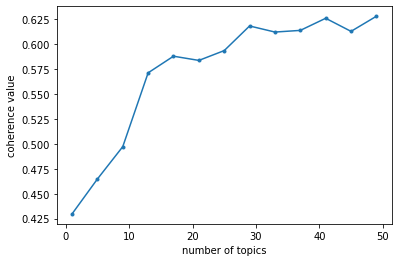

In [87]:
x = cv_50['num_topics']
y = cv_50['coherence_values']
plt.plot(x,y,'.-')
plt.xlabel('number of topics')
plt.ylabel('coherence value')
plt.savefig('cv_50.pdf')
plt.show()

In [89]:
# zoom in on 1-20
training_data = [line for line in condmat_df['cleaned']]
start = 1
stop = 21
step = 1

cv = pd.DataFrame(get_coherence_values(training_data, start, stop, step))
cv.style.hide(axis='index')

num_topics,coherence_values
1,0.429748
2,0.439491
3,0.432684
4,0.461348
5,0.464696
6,0.501188
7,0.514889
8,0.509623
9,0.497103
10,0.549722


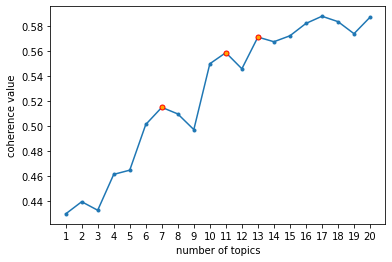

In [90]:
x = cv['num_topics']
y = cv['coherence_values']
plt.plot(x,y,'.-')
plt.plot(7,0.514889,marker='o',markerfacecolor='orange',markersize=5,color='red')
plt.plot(11,0.558592,marker='o',markerfacecolor='orange',markersize=5,color='red')
plt.plot(13,0.571027,marker='o',markerfacecolor='orange',markersize=5,color='red')
plt.xlabel('number of topics')
plt.ylabel('coherence value')
plt.xticks(np.arange(1,21,1))
plt.savefig('cv_20.pdf')
plt.show()

### Train LDA model 

In [7]:
# define function to train LDA model
def train_lda(data, num_topics, num_topic_words):
    
    # initialize the model
    # min_df = ignore terms that appear in only 1 document
    model = tp.LDAModel(k=num_topics, min_df=1, seed=123)

    # create list of cleaned text
    training_data = [line for line in data]

    # add split words from training data into the model
    for text in training_data:
        model.add_doc(text.strip().split())
    
    # train model
    print('Topic Model Training...\n')
    # iterate over the data 10 times
    iterations = 10
    for i in range(0,1000,iterations):
        model.train(iterations)
        print(f'Iteration: {i}\t Log-likelihood: {model.ll_per_word}')
    print()
    
    print('\n\nTopic Model Results: \n')
    # print out the top 10 words for each topic
    topics = []
    topic_individual_words = []
    for topic_number in range(0,num_topics):
        topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
        topics.append(topic_words)
        topic_individual_words.append(topic_words.split())
        print(f'Topic {topic_number+1} \n {topic_words}\n\n')
    print()

    # calculate coherence score
    coh = tp.coherence.Coherence(model, coherence='c_v')
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
    print('==== Coherence Score (c_v) ====')
    print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
    print()

#### Train model with candidates k to get topics

In [106]:
# set params
num_topics = 7 # set best k 
num_topic_words = 10
train_data = condmat_df['cleaned']

# train model
train_lda(train_data, num_topics, num_topic_words)

Topic Model Training...

Iteration: 0	 Log-likelihood: -8.5940275332609
Iteration: 10	 Log-likelihood: -8.055862787544902
Iteration: 20	 Log-likelihood: -7.934634255713175
Iteration: 30	 Log-likelihood: -7.89700707349045
Iteration: 40	 Log-likelihood: -7.879251484064592
Iteration: 50	 Log-likelihood: -7.869913638181361
Iteration: 60	 Log-likelihood: -7.8652633959047344
Iteration: 70	 Log-likelihood: -7.859928311512638
Iteration: 80	 Log-likelihood: -7.857562814923259
Iteration: 90	 Log-likelihood: -7.855051822715734



Topic Model Results: 

Topic 1 
 phase state model quantum interaction spin transition lattice system order


Topic 2 
 system model time function dynamic method equation theory non state


Topic 3 
 quantum electron spin phonon optical frequency field mode exciton effect


Topic 4 
 particle dynamic model simulation surface liquid force study phase result


Topic 5 
 magnetic temperature field spin phase transition order state high structure


Topic 6 
 material propert

In [102]:
# set params
num_topics = 7 # set best k 
num_topic_words = 10
train_data = condmat_df['cleaned']

# train model
train_lda(train_data, num_topics, num_topic_words)

Topic Model Training...

Iteration: 0	 Log-likelihood: -8.5940275332609
Iteration: 10	 Log-likelihood: -8.055862787544902
Iteration: 20	 Log-likelihood: -7.934634255713175
Iteration: 30	 Log-likelihood: -7.89700707349045
Iteration: 40	 Log-likelihood: -7.879251484064592
Iteration: 50	 Log-likelihood: -7.869913638181361
Iteration: 60	 Log-likelihood: -7.8652633959047344
Iteration: 70	 Log-likelihood: -7.859928311512638
Iteration: 80	 Log-likelihood: -7.857562814923259
Iteration: 90	 Log-likelihood: -7.855051822715734
Iteration: 100	 Log-likelihood: -7.853825182915922
Iteration: 110	 Log-likelihood: -7.8510587392133955
Iteration: 120	 Log-likelihood: -7.851061946941218
Iteration: 130	 Log-likelihood: -7.8491384772983785
Iteration: 140	 Log-likelihood: -7.849028202467297
Iteration: 150	 Log-likelihood: -7.848067680920034
Iteration: 160	 Log-likelihood: -7.8467773247750445
Iteration: 170	 Log-likelihood: -7.8473237562259746
Iteration: 180	 Log-likelihood: -7.846090596292891
Iteration: 190	

In [97]:
# set params
num_topics = 11 # set best k 
num_topic_words = 10
train_data = condmat_df['cleaned']

# train model
train_lda(train_data, num_topics, num_topic_words)

Topic Model Training...

Iteration: 0	 Log-likelihood: -8.684631391432402
Iteration: 10	 Log-likelihood: -8.17131721220915
Iteration: 20	 Log-likelihood: -8.023025983398286
Iteration: 30	 Log-likelihood: -7.964908194620775
Iteration: 40	 Log-likelihood: -7.936895780052657
Iteration: 50	 Log-likelihood: -7.921560768989318
Iteration: 60	 Log-likelihood: -7.9120639084765605
Iteration: 70	 Log-likelihood: -7.905334144410412
Iteration: 80	 Log-likelihood: -7.898950651304927
Iteration: 90	 Log-likelihood: -7.894330362039833



Topic Model Results: 

Topic 1 
 model method material approach network base system structure simulation property


Topic 2 
 phase transition temperature order state superconductivity superconductor superconducte critical electron


Topic 3 
 quantum model state phase system topological lattice symmetry non theory


Topic 4 
 system time model dynamic equation temperature function non equilibrium distribution


Topic 5 
 phonon electronic structure band property elect

In [103]:
# set params
num_topics = 11 # set best k 
num_topic_words = 10
train_data = condmat_df['cleaned']

# train model
train_lda(train_data, num_topics, num_topic_words)

Topic Model Training...

Iteration: 0	 Log-likelihood: -8.684631391432402
Iteration: 10	 Log-likelihood: -8.17131721220915
Iteration: 20	 Log-likelihood: -8.023025983398286
Iteration: 30	 Log-likelihood: -7.964908194620775
Iteration: 40	 Log-likelihood: -7.936895780052657
Iteration: 50	 Log-likelihood: -7.921560768989318
Iteration: 60	 Log-likelihood: -7.9120639084765605
Iteration: 70	 Log-likelihood: -7.905334144410412
Iteration: 80	 Log-likelihood: -7.898950651304927
Iteration: 90	 Log-likelihood: -7.894330362039833
Iteration: 100	 Log-likelihood: -7.892809478512954
Iteration: 110	 Log-likelihood: -7.889642925484615
Iteration: 120	 Log-likelihood: -7.888086869757697
Iteration: 130	 Log-likelihood: -7.886091222554807
Iteration: 140	 Log-likelihood: -7.883980752504405
Iteration: 150	 Log-likelihood: -7.882033744226293
Iteration: 160	 Log-likelihood: -7.8814236415763945
Iteration: 170	 Log-likelihood: -7.880526062149799
Iteration: 180	 Log-likelihood: -7.878742331464642
Iteration: 190	 

In [98]:
# set params
num_topics = 13 # set best k 
num_topic_words = 10
train_data = condmat_df['cleaned']

# train model
train_lda(train_data, num_topics, num_topic_words)

Topic Model Training...

Iteration: 0	 Log-likelihood: -8.734934793055553
Iteration: 10	 Log-likelihood: -8.208564178533901
Iteration: 20	 Log-likelihood: -8.047436490368309
Iteration: 30	 Log-likelihood: -7.9807048020259534
Iteration: 40	 Log-likelihood: -7.946499975082757
Iteration: 50	 Log-likelihood: -7.923907993668002
Iteration: 60	 Log-likelihood: -7.911236023167618
Iteration: 70	 Log-likelihood: -7.902512281682132
Iteration: 80	 Log-likelihood: -7.896796995145091
Iteration: 90	 Log-likelihood: -7.892598265532209



Topic Model Results: 

Topic 1 
 method material model approach base system network structure property datum


Topic 2 
 magnetic spin field temperature order phase magnetization state interaction transition


Topic 3 
 phase model quantum transition system state critical disorder lattice order


Topic 4 
 interaction state quantum system density energy gas model bose vortex


Topic 5 
 time system dynamic equation model non function equilibrium particle distribution


### Best Model

The best model was chosen by a subject-matter expert by comparing the topics generated by the 3 best k.

In [11]:
# ================================ #
# ========== BEST MODEL ========== #
# ======== k=13 iter=1000 ======== #
# ================================ #

# set params
num_topics = 13 # set best k 
num_topic_words = 10
train_data = condmat_df['cleaned']
# number of iterations = 1000

# train model
# train_lda(train_data, num_topics, num_topic_words)

# initialize the model
# min_df = ignore terms that appear in only 1 document
model = tp.LDAModel(k=num_topics, min_df=1, seed=123)

# create list of cleaned text
training_data = [line for line in train_data]

# add split words from training data into the model
for text in training_data:
    model.add_doc(text.strip().split())

# train model
print('Topic Model Training...\n')
# iterate over the data 10 times
iterations = 10
for i in range(0,1000,iterations):
    model.train(iterations)
    print(f'Iteration: {i}\t Log-likelihood: {model.ll_per_word}')
print()

print('\n\nTopic Model Results: \n')
# print out the top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0,num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f'Topic {topic_number+1} \n {topic_words}\n\n')
print()

# calculate coherence score
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
print('==== Coherence Score (c_v) ====')
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

# save model
model.save('best_model_13.bin')

Topic Model Training...

Iteration: 0	 Log-likelihood: -8.734934793055553
Iteration: 10	 Log-likelihood: -8.208564178533901
Iteration: 20	 Log-likelihood: -8.047436490368309
Iteration: 30	 Log-likelihood: -7.9807048020259534
Iteration: 40	 Log-likelihood: -7.946499975082757
Iteration: 50	 Log-likelihood: -7.923907993668002
Iteration: 60	 Log-likelihood: -7.911236023167618
Iteration: 70	 Log-likelihood: -7.902512281682132
Iteration: 80	 Log-likelihood: -7.896796995145091
Iteration: 90	 Log-likelihood: -7.892598265532209
Iteration: 100	 Log-likelihood: -7.88965720505068
Iteration: 110	 Log-likelihood: -7.8862733107453
Iteration: 120	 Log-likelihood: -7.884651736218905
Iteration: 130	 Log-likelihood: -7.882613261426488
Iteration: 140	 Log-likelihood: -7.881397379305958
Iteration: 150	 Log-likelihood: -7.880315378668919
Iteration: 160	 Log-likelihood: -7.878935632837048
Iteration: 170	 Log-likelihood: -7.878210030500911
Iteration: 180	 Log-likelihood: -7.876859574817528
Iteration: 190	 Log

In [12]:
# get model summary
model.summary()

<Basic Info>
| LDAModel (current version: 0.12.2)
| 76674 docs, 7402024 words
| Total Vocabs: 48450, Used Vocabs: 48450
| Entropy of words: 7.57246
| Entropy of term-weighted words: 7.57246
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 1000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -7.86596
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 1 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 13 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 123 (random seed)
| trained in version 0.12.2
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.12904438 

## Get topic distributions among the docs

In [16]:
# prepare documents for inference
docs = []
for line in train_data:
    docs.append(model.make_doc(line.strip().split()))

# let's infer
dist, ll = model.infer(docs)

In [79]:
len(dist)

76674

In [80]:
# get number of documents per topic
num_docs_per_topic = []
for i in range(len(dist)):
    top = np.argmax(dist[i])
    num_docs_per_topic.append(top)
    
count = collections.Counter(num_docs_per_topic)

In [88]:
sorted(count.items())

[(0, 4034),
 (1, 6297),
 (2, 6586),
 (3, 5898),
 (4, 7521),
 (5, 6701),
 (6, 4035),
 (7, 6472),
 (8, 4781),
 (9, 5630),
 (10, 5099),
 (11, 5240),
 (12, 8380)]

In [94]:
sum(count.values())

76674

##  Infer dominant topics from 2012-2016 docs (unseen by the model) 

In [129]:
# Get data from the metadata file

# helper method to get year from versions
def get_year(ref):
    year = []
    for data in ref:
        year = data['created'][-17:-13]
        break
    return year

# get 2012 to 2016 condensed matter physics titles and abstracts
add_titles = []
add_abstracts = []
add_years = []
add_docs = []
metadata = get_metadata()
for paper in metadata:
    paper_dict = json.loads(paper)
    ref = paper_dict.get('versions') # year is based on the first version uploaded to arXiv
    try:
        year = int(get_year(ref))
        if 2011 < year <= 2016:
            cat = category_schema[paper_dict.get('categories').split(" ")[0]]
            if cat == 'Condensed Matter Physics':
                add_years.append(year)
                add_titles.append(paper_dict.get('title'))
                add_abstracts.append(paper_dict.get('abstract'))
                add_docs.append(paper_dict.get('title') + paper_dict.get('abstract'))
    except:
        pass 

# check if correctly parsed: values should be the same
len(add_titles), len(add_abstracts), len(add_years), len(add_docs) 

(66575, 66575, 66575, 66575)

In [130]:
# build dataframe from the lists
add_df = pd.DataFrame({'title': add_titles,
                       'year': add_years,
                       'abstract': add_abstracts,
                       'doc': add_docs})

In [131]:
add_df.info()
add_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66575 entries, 0 to 66574
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     66575 non-null  object
 1   year      66575 non-null  int64 
 2   abstract  66575 non-null  object
 3   doc       66575 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


,title,year,abstract,doc
0,Yield of exciton dissociation in a donor-accep...,2012,A simple model is constructed to describe di...,Yield of exciton dissociation in a donor-accep...
1,Visualizing the atomic scale electronic struct...,2012,Although the mechanism of superconductivity ...,Visualizing the atomic scale electronic struct...
2,Vortex trimer in three-component Bose-Einstein...,2012,Vortex trimer is predicted in three-componen...,Vortex trimer in three-component Bose-Einstein...
3,Superfluidity of Bose-Einstein condensates in ...,2012,Superfluid properties of Bose-Einstein conde...,Superfluidity of Bose-Einstein condensates in ...
4,Training and recovery behaviours of exchange b...,2012,Training and recovery of exchange bias in Fe...,Training and recovery behaviours of exchange b...


In [134]:
# clean the text in ['doc'] then save results to new column 'cleaned'
add_df['cleaned'] = add_df['doc'].map(clean_text)

In [135]:
add_df.head()

,title,year,abstract,doc,cleaned
0,Yield of exciton dissociation in a donor-accep...,2012,A simple model is constructed to describe di...,Yield of exciton dissociation in a donor-accep...,yield exciton dissociation donor acceptor syst...
1,Visualizing the atomic scale electronic struct...,2012,Although the mechanism of superconductivity ...,Visualizing the atomic scale electronic struct...,visualize atomic scale electronic structure mo...
2,Vortex trimer in three-component Bose-Einstein...,2012,Vortex trimer is predicted in three-componen...,Vortex trimer in three-component Bose-Einstein...,vortex trimer component bose einstein condensa...
3,Superfluidity of Bose-Einstein condensates in ...,2012,Superfluid properties of Bose-Einstein conde...,Superfluidity of Bose-Einstein condensates in ...,superfluidity bose einstein condensate toroida...
4,Training and recovery behaviours of exchange b...,2012,Training and recovery of exchange bias in Fe...,Training and recovery behaviours of exchange b...,training recovery behaviour exchange bias feni...


In [136]:
# check breakdown of docs per year
add_df.groupby('year').count()

,title,abstract,doc,cleaned
year,,,,
2012,12138,12138,12138,12138
2013,12780,12780,12780,12780
2014,13110,13110,13110,13110
2015,13925,13925,13925,13925
2016,14622,14622,14622,14622
